<a href="https://colab.research.google.com/github/anonymax25/tensorflow-jupyter-exo/blob/master/03_exercice_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercice : prédiction du coût de l'assurance médicale pour un échantillon d'individus en fonction de différents paramètres

Nous allons ici appliquer les fondamentaux vus jusqu'ici sur un jeu de données mis à disposition publiquement sur Kaggle : [Medical Cost dataset](https://www.kaggle.com/mirichoi0218/insurance)

Comme dit dans le titre du notebook, nous allons essayer de prédire le coût de l'assurance médicale d'individus en fonction de plusieurs paramètres :
- l'âge `age`
- le sexe `sex`
- l'indice de masse corporelle `bmi`
- le nombre d'enfants `children`
- le statut de fumeur ou non `smoker`
- la région de résidence `region`
- l'indice de masse corporelle `bmi`

Le fichier csv du jeu de données est disponible directement sur [GitHub](https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/insurance.csv).

Commençons par importer les bibliothèques nécessaires :

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

Importons maintenant les données (lien à utliser pour récupérer les données : https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv) :

In [ ]:
assurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv", sep=',')

La méthode `head()` nous permet d'afficher les premiers lignes du dataset (par défaut, les 5 premières ligns si aucune valeur n'est renseignée) :

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
assurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Nous allons devoir transformer les variables non-numériques en nombres.

Pour ce faire, nous allons utliser la méthode `get_dummies()` de pandas qui convertit les variables catégorielles en variables numériques en utilisant l'encodage one-hot :

In [ ]:
assurance_one_hot = 
# visualisation des 5 premières lignes


,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [53]:
assurance_one_hot = pd.get_dummies(assurance)
assurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


Séparons notre jeu de données de telle sorte à avoir nos variables explicatives (`X`) et notre variable à expliquer (`y`) séparement :

In [ ]:
X = assurance
y = 

In [54]:
X = assurance_one_hot.drop("charges", axis=1)
y = assurance_one_hot["charges"]

In [ ]:
# visualisation des 5 premières lignes de X


,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [55]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [56]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

Nous pouvons maintenant créer nos différents jeux de données (jeu d'entraînement et jeu de test ici).

Nous pourrions le faire manuellement comme nous l'avons déjà fait auparavant mais nous allons cette fois-ci le faire en utilisant la fonction `train_test_split()` de scikit-learn (20% des données pour le jeu de test, en spécifiant le paramètre `random_state` à 42) :

In [ ]:

X_train, X_test, y_train, y_test =

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Nous pouvons maintenant passer à l'étape de modélisation (nous pouvons commencer par garder la même configuration que le modèle `modele_2` vu précédemment) :

In [ ]:
# Choix du nombre aléatoire (pour la reproductibilité des calculs)
tf.random.set_seed(42)

# Création d'un modèle en utilisant l'API séquentielle
modele_assurance =

# Compilation du modèle


# Entraînement du modèle


Epoch 1/100

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

34/34 [==============================] - 0s 120us/step - loss: 8868.5928 - mae: 8868.5928
Epoch 2/100
34/34 [==============================] - 0s 536us/step - loss: 7887.1606 - mae: 7887.1606
Epoch 3/100
34/34 [==============================] - 0s 465us/step - loss: 7537.0952 - mae: 7537.0952
Epoch 4/100
34/34 [==============================] - 0s 441us/step - loss: 7859.4346 - mae: 7859.4346
Epoch 5/100
34/34 [==============================] - 0s 441us/step - loss: 7639.6709 - mae: 7639.670

In [75]:

# Choix du nombre aléatoire (pour la reproductibilité des calculs)
tf.random.set_seed(42)

# Création d'un modèle en utilisant l'API séquentielle
modele_assurance = tf.keras.Sequential([tf.keras.layers.Dense(1), tf.keras.layers.Dense(1)])

# Compilation du modèle
modele_assurance.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.SGD(),metrics=["mae"])

# Entraînement du modèle
modele_assurance.fit(X_train, y_train, epochs=100, verbose=0)

Evaluons le modèle sur le jeu de test :

9/9 [==============================] - 0s 666us/step - loss: 8628.2451 - mae: 8628.2451


[8628.2451171875, 8628.2451171875]

In [76]:
modele_assurance.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 8628.2393 - mae: 8628.2393


[8628.2392578125, 8628.2392578125]

Notre modèle n'est pas très performant : nous allons tester un modèle plus complexe.

Nous allons essayer 3 choses :
- augmenter le nombre de couches (2 -> 3)
- augmenter le nombre de neurones dans chaque couche (sauf pour la couche en sortie)
- changer l'optimizer (SGD -> Adam)

Nous gardons le reste inchangé :

In [ ]:
# Choix du nombre aléatoire (pour la reproductibilité des calculs)
tf.random.set_seed(42)

# Création d'un modèle en utilisant l'API séquentielle : 100 neurones pour la couche en entrée, 10 pour la couche intermédiaire (hidden layer) et on garde 1 seul neurone sur la couche en sortie
modele_assurance_2 = tf.keras.Sequential([tf.keras.layers.Dense(100), tf.keras.layers.Dense(10), tf.keras.layers.Dense(1)])

# Compilation du modèle


# Entraînement du modèle : nous sauvegardons l'entraînement pour pouvoir ensuite tracé l'historique de l'entraînement
historique_entrainement = 


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



In [102]:
# Choix du nombre aléatoire (pour la reproductibilité des calculs)
tf.random.set_seed(42)

# Création d'un modèle en utilisant l'API séquentielle : 100 neurones pour la couche en entrée, 10 pour la couche intermédiaire (hidden layer) et on garde 1 seul neurone sur la couche en sortie
modele_assurance_2 = tf.keras.Sequential([tf.keras.layers.Dense(100), tf.keras.layers.Dense(10), tf.keras.layers.Dense(1)])

# Compilation du modèle
modele_assurance_2.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.Adam(),metrics=["mae"])

# Entraînement du modèle : nous sauvegardons l'entraînement pour pouvoir ensuite tracé l'historique de l'entraînement
historique_entrainement = modele_assurance_2.fit(X_train, y_train, epochs=100, verbose=0)

Evaluons ce nouveau modèle sur le jeu de test :

9/9 [==============================] - 0s 555us/step - loss: 4924.3477 - mae: 4924.3477


[4924.34765625, 4924.34765625]

In [103]:
modele_assurance_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4924.3477 - mae: 4924.3477


[4924.34765625, 4924.34765625]

Les résultats sont bien mieux !

L'utilisation d'un modèle plus large et de l'optimizer Adam a conduit à quasiment réduire l'erreur de moitié par rapport au modèle précédent.

Nous allons pouvoir représenter les courbes de perte de notre modèle, grâce à la variable `historique_entrainement` que nous avons sauvegardée :

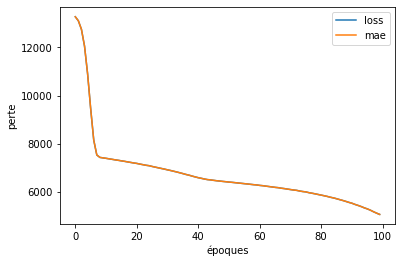

In [ ]:
# variable historique_perte créée à partir de la méthode history
historique_perte = 

# tracé du DataFrame obtenu à partir de la variable historique_perte

plt.ylabel("")
plt.xlabel("");

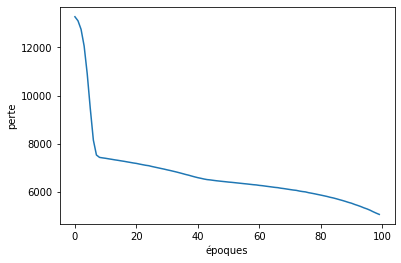

In [104]:
# variable historique_perte créée à partir de la méthode history
historique_perte = historique_entrainement.history

# tracé du DataFrame obtenu à partir de la variable historique_perte
plt.plot(historique_perte['loss'], label='perte')
plt.ylabel("perte")
plt.xlabel("époques");

Nous pouvons remarquer que l'erreur de notre modèle décroit.

A partir de là, nous pouvons supposer que l'erreur peut continuer à diminuer si l'entraînement dure plus longtemps.

Testons cette hypothèse : nous allons entraîner le modèle sur 100 époques supplémentaires.

Nous pouvons faire cela simplement en appelant à nouveau la méthode `fit()` sur notre modèle (nous allons à nouveau sauvegarder l'entraînement pour pouvoir visualiser les pertes en fonction des époques) :

In [ ]:
historique_entrainement_2 = 

In [105]:
historique_entrainement_2 = modele_assurance_2.fit(X_train, y_train, epochs=200, verbose=0)

Comment l'entraînement supplémentaire s'est déroulé ? Evaluons notre modèle pour le savoir :

In [ ]:
modele_assurance_2_perte, modele_assurance_2_mae = 
modele_assurance_2_perte, modele_assurance_2_mae

9/9 [==============================] - 0s 667us/step - loss: 3494.7283 - mae: 3494.7283


(3494.728271484375, 3494.728271484375)

In [106]:
modele_assurance_2_perte, modele_assurance_2_mae = modele_assurance_2.evaluate(X_test, y_test)
modele_assurance_2_perte, modele_assurance_2_mae

9/9 [==============================] - 0s 2ms/step - loss: 3211.1047 - mae: 3211.1047


(3211.104736328125, 3211.104736328125)

Intéressant ! Entraîner notre modèle sur 100 époques supplémentaires conduit à une diminution de l'erreur de 10%.

Visualisons cela :

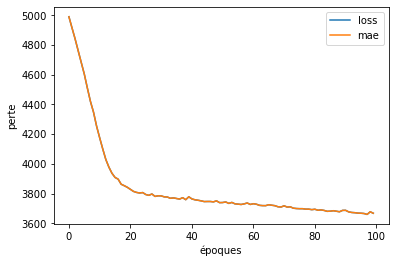

In [ ]:
# tracé du DataFrame obtenu à partir de la variable historique_entrainement_2 (nous n'aurons que les 100 dernières époques puisque l'on a écrasé l'historique de l'entraînement précédent)




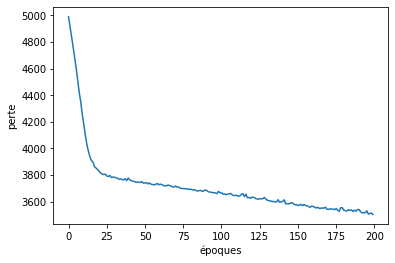

In [107]:

# tracé du DataFrame obtenu à partir de la variable historique_perte
plt.plot(historique_entrainement_2.history['loss'], label='perte')
plt.ylabel("perte")
plt.xlabel("époques");

## Pré-traitement des données

Une pratique courante lorsque l'on travaille avec des réseaux de neurones est de s'assurer que toutes les données que nous leur fournissons (les données d'entrée) sont comprises entre 0 et 1.

C'est ce que l'on appelle la **transformation min-max** (appelée en anglais *min-max scaling* ou parfois *normalization*).

Une autre approche est la **normalisation** (*standardization* en anglais) : c'est le fait de convertir les données de telle sorte à avoir une variance unitaire et une moyenne nulle.

Ces deux pratiques font souvent partie d'un pipeline de transformation (série de fonctions qui préparent les données pour l'utilisation dans les modèles de machine learning).

Voici les étapes que nous allons suivre pour pré-traiter nos données avant de les utiliser dans notre modèle :
- transformer d'abord toutes nos données en nombre (ce que nous avons fait précédemment en utilisant `get_dummies()`)
- s'assurer que nos données sont de la bonne forme
- recalibrer nos variables (**feature scaling**) :
    - transformation min-max : il faut soustraire la valeur minimum puis diviser le résultat par la valeur maximale moins la valeur minimale
    - normalisation : il faut soustraire la valeur moyenne puis diviser le résultat par l'écart-type (*standard deviation*)

Comme dit plus haut, nous allons préférer la transformation min-max pour le recalibrage de nos données.

Chargeons nos données à nouveau :

In [ ]:
assurance = 

In [ ]:
# visualisation des 5 premières lignes


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [108]:
assurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Nous devons transformer nos données non-numériques en nombre et recalibrer nos données numériques (transformation min-max).

Pour ce faire, nous allons utiliser des classes de scikit-learn :
- `make_column_transformer` pour créer une fonction pour les deux étapes de pré-traitement de nos données
- `MinMaxScaler` pour la transformation min-max
- `OneHotEncoder` pour la transformation des variables catégorielles

Implémentons cela :

In [ ]:



# Création du pipeline (column transformer) : en paramètre, on spécifie les transformation avec leurs colonnes à traiter (sous forme de tuple (transformer, colonnes))
pipeline = make_column_transformer(
    (, []), # transformation min-max
    (, []) #one-hot encoder
)

# Création de X (variables explicatives) et y (étiquette) (comme précédemment)
X = 
y = 

# Création des jeux d'entraînement et de test (comme précédemment)
X_train, X_test, y_train, y_test = 

# On commence par entraîner le pipeline sur le jeu d'entraînement seulement avec la méthode fit()


# Nous pouvons enfin transformer nos données (le jeu d'entraînement ainsi que le jeu de test) avec la méthode transform()
X_train_normal = 
X_test_normal = 

In [109]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Création du pipeline (column transformer) : en paramètre, on spécifie les transformation avec leurs colonnes à traiter (sous forme de tuple (transformer, colonnes))
pipeline = make_column_transformer(
(MinMaxScaler(), ["age", "bmi", "children"]), # transformation min-max
(OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"]) #one-hot encoder
)

X = assurance.drop("charges", axis=1)
y = assurance["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline.fit(X_train)

# Nous pouvons enfin transformer nos données (le jeu d'entraînement ainsi que le jeu de test)
X_train_normal = pipeline.transform(X_train)
X_test_normal = pipeline.transform(X_test)

A quoi ressemble nos données transformées ?

In [ ]:
# le jeu d'entraînement d'origine (la première ligne du jeu par exemple)


age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [118]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
# le jeu d'entraînement transformé (la première ligne du jeu par exemple)


array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [119]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

Qu'en est-il de la forme des données ?

In [ ]:
# forme du jeu d'entraînement d'origne, forme du jeu d'entraînement transformé
 , 

((1070, 6), (1070, 11))

In [127]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Nous pouvons maintenant passer à la modélisation.

Nous allons utiliser le même modèle que `modele_assurance_2`, entraîné sur 200 époques :

In [129]:
# Choix du nombre aléatoire (pour la reproductibilité des calculs)
tf.random.set_seed(42)

# Création d'un modèle en utilisant l'API séquentielle : 100 neurones pour la couche en entrée, 10 pour la couche intermédiaire (hidden layer) et on garde 1 seul neurone sur la couche en sortie
modele_assurance_3 = tf.keras.Sequential([tf.keras.layers.Dense(100), tf.keras.layers.Dense(10), tf.keras.layers.Dense(1)])

# Compilation du modèle
modele_assurance_3.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.Adam(),metrics=["mae"])

# Entraînement du modèle : nous sauvegardons l'entraînement pour pouvoir ensuite tracé l'historique de l'entraînement
historique_entrainement = modele_assurance_3.fit(X_train_normal, y_train, epochs=100, verbose=0)

Nous pouvons évaluer le modèle sur le jeu de test transformé :

In [ ]:
modele_assurance_3_perte, modele_assurance_3_mae = modele_assurance_3.evaluate(X_test, y_test)


9/9 [==============================] - 0s 650us/step - loss: 3171.5774 - mae: 3171.5774


(3171.577392578125, 3171.577392578125)

In [130]:
modele_assurance_3_perte, modele_assurance_3_mae = modele_assurance_3.evaluate(X_test, y_test)

ValueError: ignored

Pour finir, comparons les résultats du modèle `modele_assurance_2` (entraîné sur les données non-transformées) et du modèle `modele_assurance_3` (entraîné sur les données transformées) :

(3494.728271484375, 3171.577392578125)

A partir de ces résultats, nous pouvons voir qu'une simple transformation min-max a conduit à réduire l'erreur de 10% en utilisant le même modèle.

C'est un des grands avantages de la transformation min-max : le modèle obtient de meilleurs résultats plus rapidement (temps de convergence plus rapide).